# NYC Gentrification Classification
## EDA Notebook

#### By Paul Torres

## Import Packages

In [1]:
%matplotlib inline
import pandas as pd
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import numpy as np
warnings.filterwarnings("ignore")
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
sns.set(rc={'figure.figsize':(15,10)})
plt.style.use('fivethirtyeight')
city_infographics = ['#7297d2','#daa525', '#90bcf4', '#1b2a4d', '#fad363', '#4d6bab', '#484b54', '#676e7c', '#5b89c0', '#3c64a4']
sns.set_palette(city_infographics)

In [2]:
df = pd.read_pickle('PKL/nyc_full_pc.pkl')

## First, we take a look at the quantitative stats

In [3]:
df.describe()

,POP10_POP00_%,NHWHT10%_NHWHT00%,NHBLK10%_NHBLK00%,NTV10%_NTV00%,ASIAN10%_ASIAN00%,HISP10%_HISP00%,HAW10%_HAW00%,INDIA10%_INDIA00%,CHINA10%_CHINA00%,FILIP10%_FILIP00%,JAPAN10%_JAPAN00%,KOREA10%_KOREA00%,VIET10%_VIET00%,MEX10%_MEX00%,PR10%_PR00%,CUBAN10%_CUBAN00%,VAC10%_VAC00%,OHU10%_OHU00%,A18UND10%_A18UND00%,A60UP10%_A60UP00%,A75UP10%_A75UP00%,AGEWHT10%_AGEWHT00%,A15WHT10%_A15WHT00%,A60WHT10%_A60WHT00%,AGEBLK10%_AGEBLK00%,A15BLK10%_A15BLK00%,A60BLK10%_A60BLK00%,AGEHSP10%_AGEHSP00%,A15HSP10%_A15HSP00%,A60HSP10%_A60HSP00%,AGENTV10%_AGENTV00%,A15NTV10%_A15NTV00%,A60NTV10%_A60NTV00%,AGEASN10%_AGEASN00%,A15ASN10%_A15ASN00%,A60ASN10%_A60ASN00%,FAMILY10%_FAMILY00%,FHH10%_FHH00%,OWN10%_OWN00%,RENT10%_RENT00%,NONWHT10%_NONWHT00%,AG15UP12%_AG15UP00%,AG18CV12%_AG18CV00%,AG25UP12%_AG25UP00%,AG5UP12%_AG5UP00%,CLF12%_CLF00%,COL12%_COL00%,DAPOV12%_DAPOV00%,DBPOV12%_DBPOV00%,DFLABF12%_DFLABF00%,DFMPOV12%_DFMPOV00%,DHPOV12%_DHPOV00%,DMULTI12_DMULTI00,DNAPOV12%_DNAPOV00%,DPOV12%_DPOV00%,DWPOV12%_DWPOV00%,EMPCLF12%_EMPCLF00%,FB12%_FB00%,FLABF12%_FLABF00%,GEANC12%_GEANC00%,GEFB12%_GEFB00%,H10YRS12%_H10YRS00%,H30OLD12%_H30OLD00%,HH12_HH00,HHA12%_HHA00%,HHB12%_HHB00%,HHH12%_HHH00%,HHW12%_HHW00%,HINC12_HINC00,HINCA12_HINCA00,HINCB12_HINCB00,HINCH12_HINCH00,HINCW12_HINCW00,HS12%_HS00%,INCPC12_INCPC00,IRANC12%_IRANC00%,IRFB12%_IRFB00%,ITANC12%_ITANC00%,ITFB12%_ITFB00%,LEP12%_LEP00%,MANUF12%_MANUF00%,MHMVAL12_MHMVAL00,MRENT12_MRENT00,MULTI12_MULTI00,Mar-12%_Mar-00%,N10IMM12%_N10IMM00%,N65POV12%_N65POV00%,NAPOV12%_NAPOV00%,NAT12%_NAT00%,NBPOV12%_NBPOV00%,NFMPOV12%_NFMPOV00%,NHPOV12%_NHPOV00%,NNAPOV12%_NNAPOV00%,NONWHT_POV12%_NONWHT_POV00%,NPOV12%_NPOV00%,NWPOV12%_NWPOV00%,OHU12%_OHU00SP%,OLANG12%_OLANG00%,PROF12%_PROF00%,RUANC12%_RUANC00%,RUFB12%_RUFB00%,SCANC12%_SCANC00%,SCFB12%_SCFB00%,SEMP12%_SEMP00%,UNEMP12%_UNEMP00%,VET12%_VET00%,WDS12%_WDS00%
count,1970.000000,1970.000000,1970.000000,1970.000000,1970.000000,1970.000000,1.970000e+03,1970.000000,1970.000000,1.970000e+03,1970.000000,1970.000000,1.970000e+03,1970.000000,1970.000000,1970.000000,1970.000000,1970.000000,1970.000000,1970.000000,1970.000000,1970.000000,1970.000000,1970.000000,1970.000000,1970.000000,1970.000000,1970.000000,1970.000000,1970.000000,1970.000000,1.970000e+03,1970.000000,1970.000000,1970.000000,1970.000000,1970.000000,1970.000000,1970.000000,1970.000000,1970.000000,1970.000000,1970.000000,1970.000000,1970.000000,1970.000000,1970.000000,1970.000000,1970.000000,1970.000000,1970.000000,1970.000000,1970.000000,1.970000e+03,1970.000000,1970.000000,1970.000000,1970.000000,1970.000000,1970.000000,1970.000000,1970.000000,1970.000000,1970.000000,1970.000000,1970.000000,1970.000000,1970.000000,1970.000000,1970.000000,1970.000000,1970.000000,1970.000000,1970.000000,1970.000000,1970.000000,1970.000000,1.970000e+03,1970.000000,1970.000000,1970.000000,1970.000000,1970.000000,1970.000000,1970.000000,1970.000000,1970.000000,1.970000e+03,1970.000000,1970.000000,1970.000000,1970.000000,1970.000000,1970.000000,1970.000000,1970.000000,1970.000000,1970.000000,1970.000000,1.970000e+03,1970.000000,1970.000000,1970.000000,1970.000000,1970.000000,1970.000000,1970.000000
mean,4.138539,38.676142,28.021756,66.794493,65.681909,17.952793,2.799995e+03,65.398557,90.589692,7.392085e+02,183.522455,130.122947,2.927425e+03,160.238526,2.177707,50.462434,351.297315,163.756232,-8.575379,12.319911,8.414008,38.676142,45.878384,5.928833,32.220340,47.468311,60.891674,17.952793,10.238157,56.118225,256.326414,2.185299e+03,257.207934,74.394712,69.897910,124.197008,-1.524238,-6.451600,11.197610,-2.197926,8.794389,3.513783,3.705507,3.926690,0.301506,18.071835,56.077591,113.587610,98.123089,2.468330,-2.312401,27.911132,8.115120,6.835814e+02,0.603133,73.908064,19.812235,9.858243,20.854299,26.191077,90.883229,5.257418,7.950704,4.538245,120.490711,57.688209,31.224183,142.269934,43.111345,35.822279,33.391758,49.954955,62.095404,-11.567019,44.994037,28.441932,15.458832,1.339306e+03,262.043843,69.229356,-11.984300,146.012080,65.92

## Distribution of the Population Changes Across all Tracts
From this graph we can see that the mean is very close to zero and has tails on both the positive and negative sides. 

However, the outliers on the positive side far outstretch those on the negative side. 

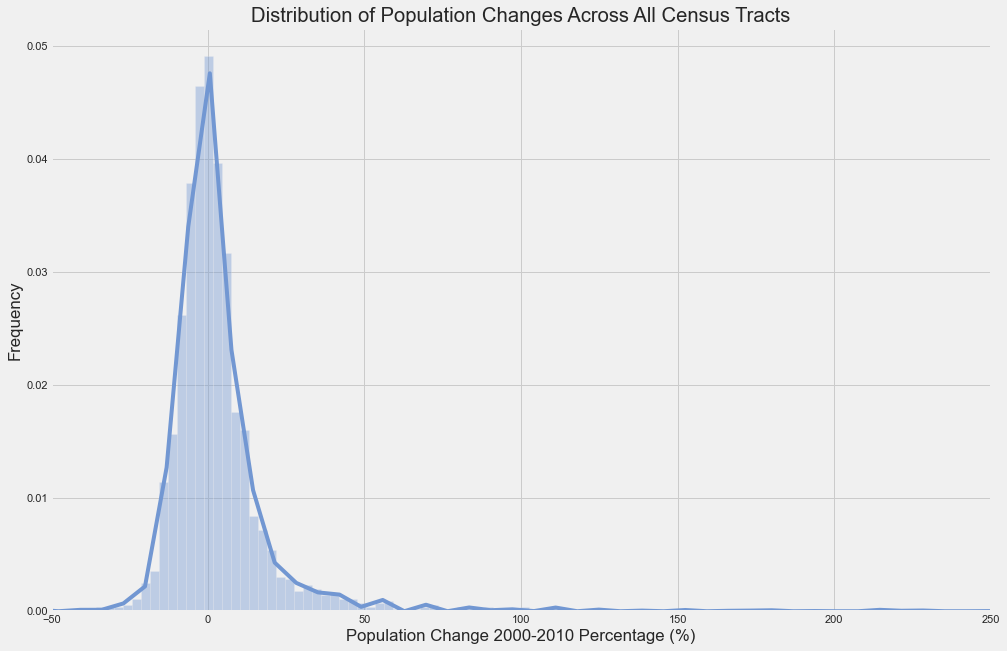

In [4]:
ax = sns.distplot(df['POP10_POP00_%'],bins=300)

ax.set(xlabel='Population Change 2000-2010 Percentage (%)',ylabel='Frequency', xlim = (-50,250))
ax.set_title('Distribution of Population Changes Across All Census Tracts')

plt.savefig('Images/Population_change_dist.png', bbox_inches= 'tight', padding_inches = 4, transparent = True )


## Tracts with Largest Population Declines from 2000-2010

The largest decrease is Tract # 36061023802, which is the northern portion of Roosevelt Island in the East River.  
The next largest decrease is Tract # 36005020502, which is the Morris Heights section of the Bronx.

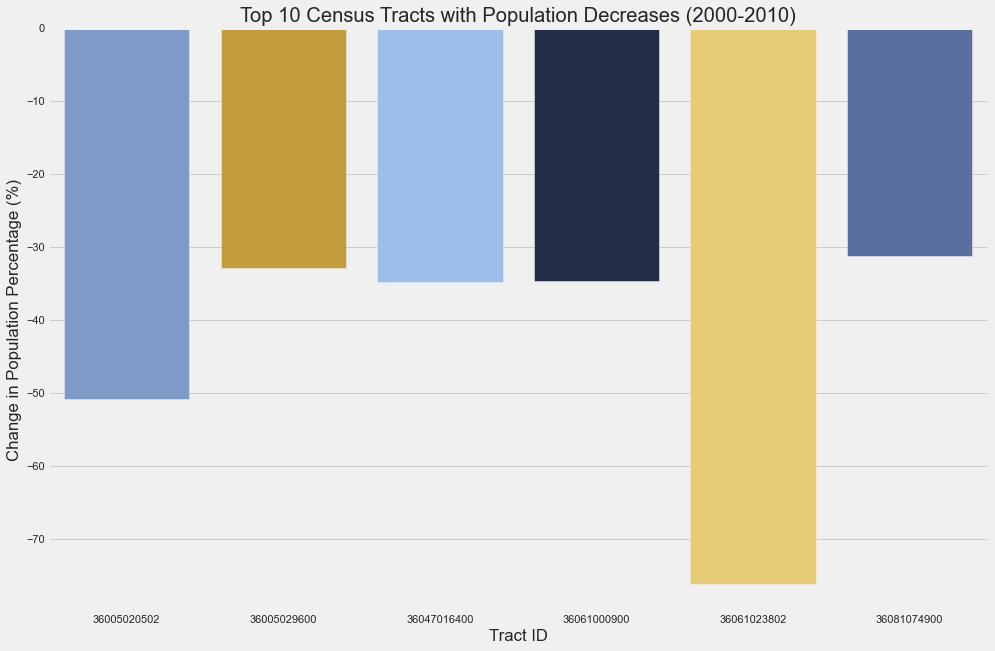

In [16]:
ax = sns.barplot(y='POP10_POP00_%',x='TRACTID',data=df[df['POP10_POP00_%']<-30])

ax.set(xlabel='Tract ID',ylabel='Change in Population Percentage (%)')
ax.set_title('Top 10 Census Tracts with Population Decreases (2000-2010)')
plt.savefig('Images/Population_change_negative.png', bbox_inches= 'tight', padding_inches = 4, transparent = True )

## Tracts with Largest Increases from 2000-2010

The largest increase is Tract # 36061000700, which is Wall Street Section of Lower Manhattan.  
The next largest increase is Tract # 36061002100, which is in the Tribeca neighborhood in Lower Manhattan.

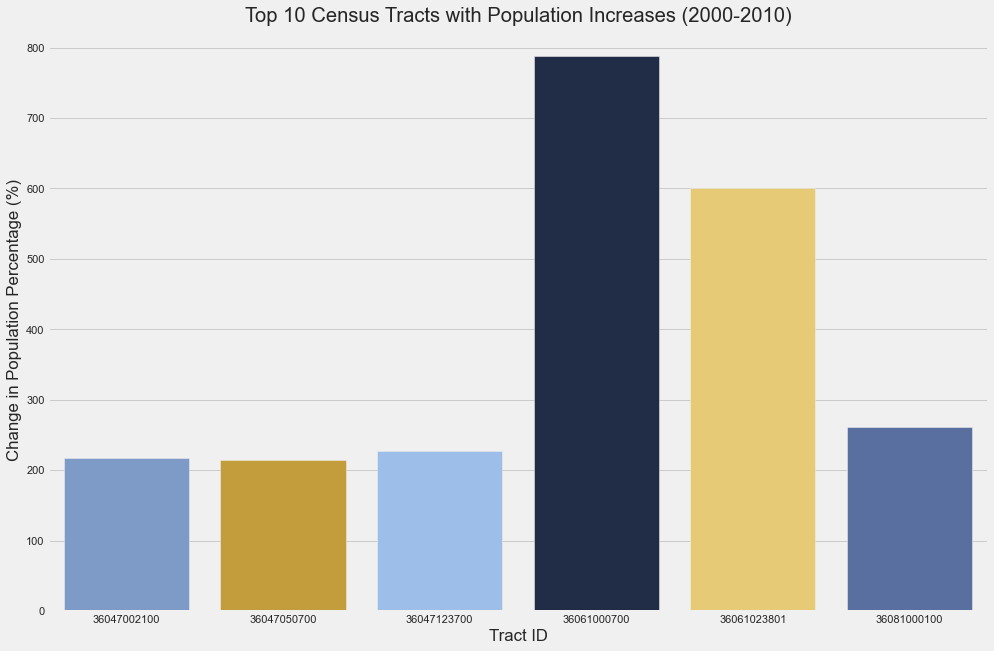

In [17]:
fig, ax = plt.subplots(figsize = (15,10))
sns.barplot(y='POP10_POP00_%',x='TRACTID',data=df[df['POP10_POP00_%']>200])

ax.set(xlabel='Tract ID',ylabel='Change in Population Percentage (%)')
ax.set_title('Top 10 Census Tracts with Population Increases (2000-2010)')
plt.savefig('Images/Population_change_positive.png', dpi=300, bbox_inches= 'tight', padding_inches = 4, transparent = True )

## Distribution of white and non-white population changes from 2000-2010
There are more outliers in the positive direction for white populations

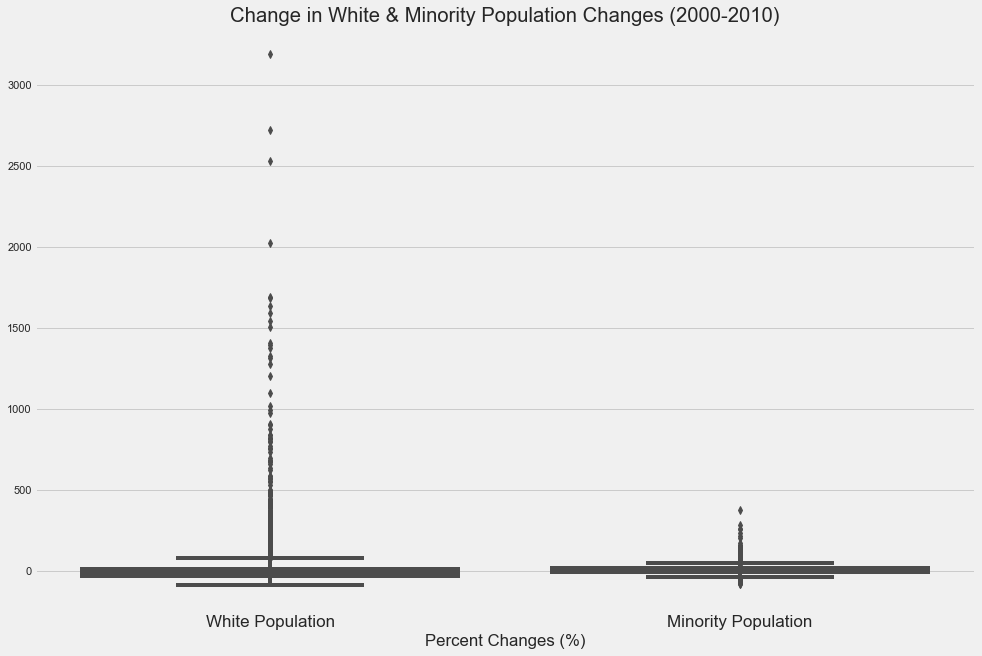

In [7]:
ax = sns.boxplot(data=df[['NHWHT10%_NHWHT00%','NONWHT10%_NONWHT00%']])

ax.set_title('Change in White & Minority Population Changes (2000-2010)')
plt.xticks([0,1],['White Population','Minority Population'], fontsize = 17)
plt.xlabel('Percent Changes (%)')
plt.savefig('Images/Race_pop_changes.png', bbox_inches= 'tight', padding_inches = 4, transparent = True )

# Histogram of Population Percent Change Distribution

The minority population has a much higher frequency count overall.   
But the outliers for the white population extend far off upwards of almost 800%.

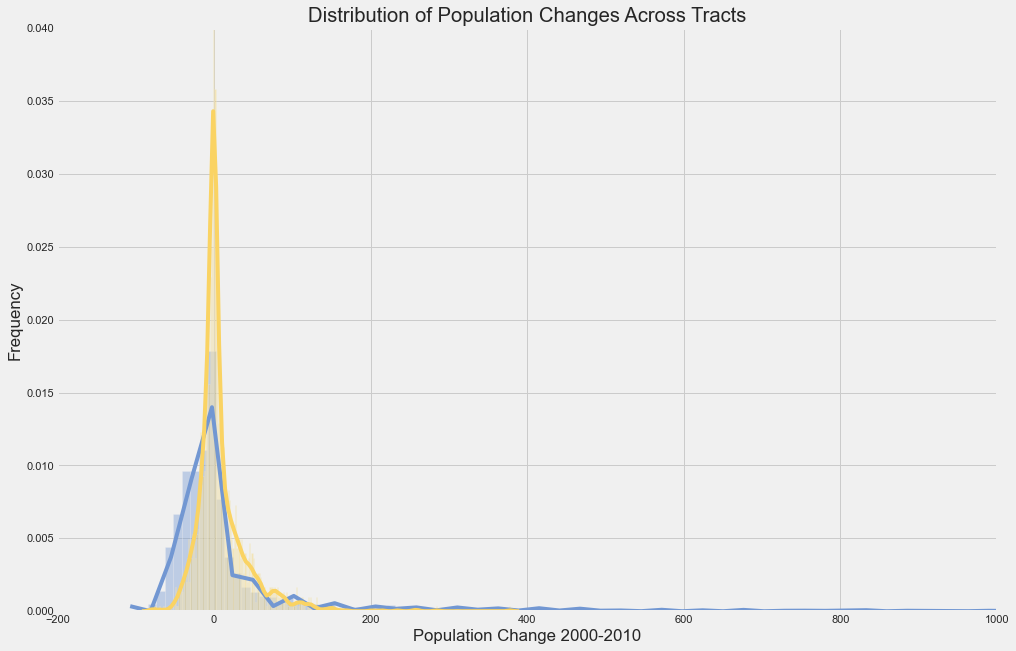

In [8]:
fig, ax = plt.subplots(figsize = (15,10))
sns.distplot(df['NHWHT10%_NHWHT00%'],bins=300)
sns.distplot(df['NONWHT10%_NONWHT00%'],bins=300, color = '#fad363')

ax.set(xlabel='Population Change 2000-2010',ylabel='Frequency', ylim = (0,0.04), xlim = (-200,1000))
ax.set_title('Distribution of Population Changes Across Tracts')

plt.savefig('Images/Population_change_dist_race.png', dpi=300, bbox_inches= 'tight', padding_inches = 4, transparent = True )


## I wanted to do a deeper dive into the trends of population changes

From this graph, we can see that the minority population is moving into more neighborhoods than their white counter parts

### But this does not tell us much about the quanitity of people moving, merely how many census tracts are being affected

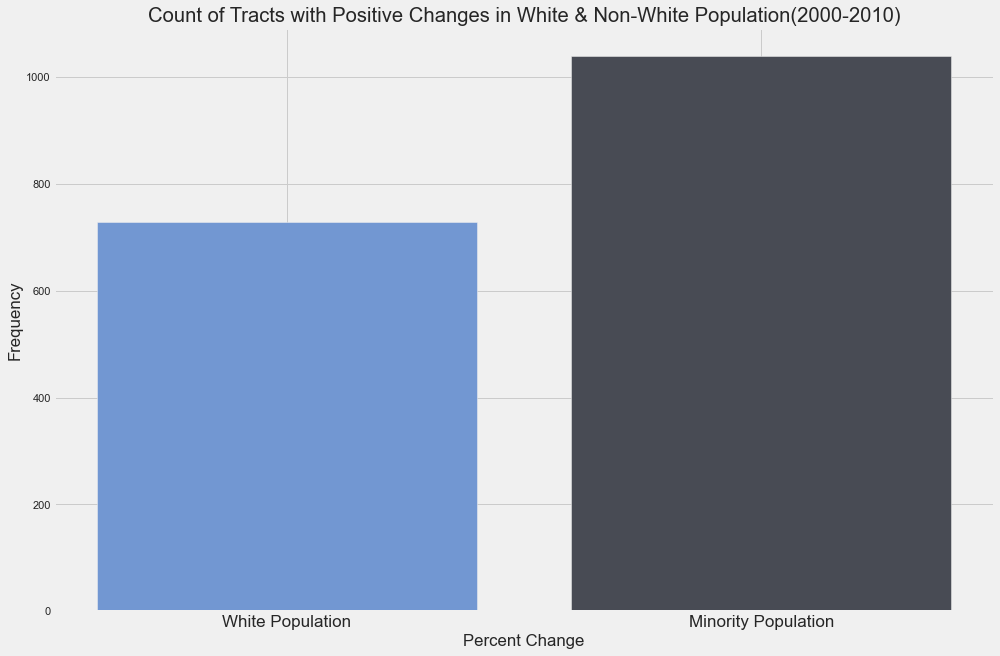

In [9]:
ax = plt.bar(x = ['NHWHT10%_NHWHT00%','NONWHT10%_NONWHT00%'],
             height = [len(df[df['NHWHT10%_NHWHT00%'] > 0]),len(df[df['NONWHT10%_NONWHT00%'] > 0])],
             data=df, color = ('#7297d2','#484b54'))
plt.ylabel('Frequency') 
plt.xlabel('Percent Change')
plt.xticks([0,1],['White Population','Minority Population'], fontsize = 17)
plt.title('Count of Tracts with Positive Changes in White & Non-White Population(2000-2010)')
plt.savefig('Images/count_positive_race_pop_changes.png', dpi=300, bbox_inches= 'tight', padding_inches = 4, transparent = True )

## When filtering out lower level increases, we see a change in the dynamic

The frequency of higher persons moving into census tracts leans much more heavily in the direction of white populations

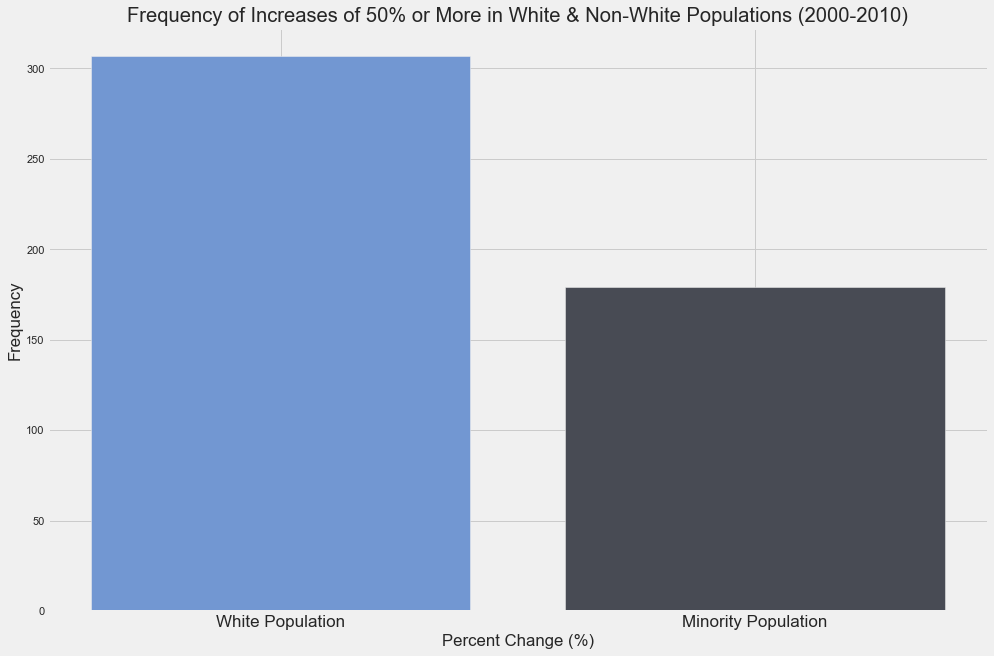

In [10]:
ax = plt.bar(x = ['NHWHT10%_NHWHT00%','NONWHT10%_NONWHT00%'],
             height = [len(df[df['NHWHT10%_NHWHT00%'] > 50]),len(df[df['NONWHT10%_NONWHT00%'] > 50])],
             data=df,color = ('#7297d2','#484b54'))
plt.ylabel('Frequency') 
plt.xlabel('Percent Change (%)')
plt.xticks([0,1],['White Population','Minority Population'], fontsize = 17)
plt.title('Frequency of Increases of 50% or More in White & Non-White Populations (2000-2010)')
plt.savefig('Images/50_increase_count_race_pop_changes.png', dpi=300, bbox_inches= 'tight', padding_inches = 4, transparent = True )

# be more clear on the title

## Graphing the mean for each of the racial categories

The average percent increase of minority population changes is approximately 12%.  
While the average percent increase of white population changes is approximately 39%.

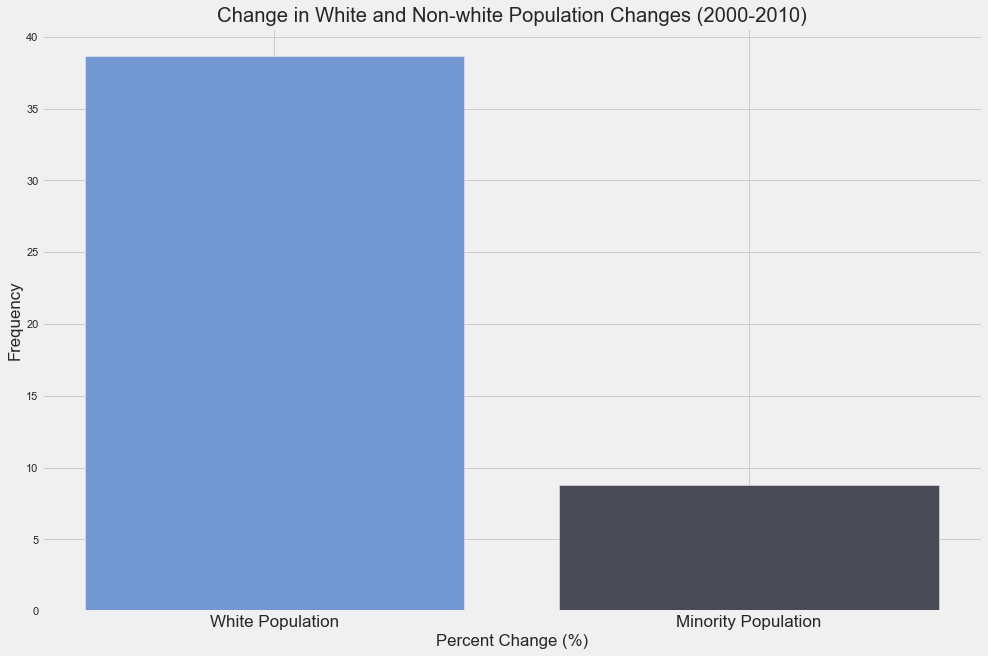

In [11]:
ax = plt.bar(x = ['NHWHT10%_NHWHT00%','NONWHT10%_NONWHT00%'],
             height = [df['NHWHT10%_NHWHT00%'].mean(),df['NONWHT10%_NONWHT00%'].mean()],
             data=df,color = ('#7297d2','#484b54'))
plt.ylabel('Frequency') 
plt.xlabel('Percent Change (%)')
plt.xticks([0,1],['White Population','Minority Population'], fontsize = 17)
plt.title('Change in White and Non-white Population Changes (2000-2010)')
plt.savefig('Images/mean_increase_count_race_pop_changes.png', dpi=300, bbox_inches= 'tight', padding_inches = 4, transparent = True )


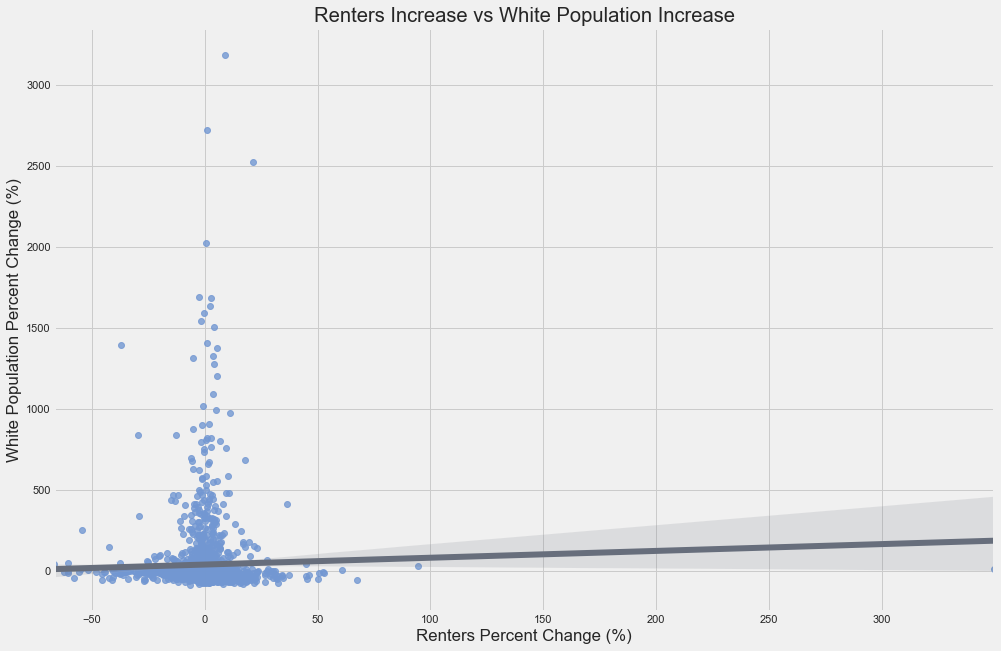

In [12]:
# change in percentage of people who are white vs change of renter occupation

ax = sns.regplot(x='RENT10%_RENT00%',y='NHWHT10%_NHWHT00%',data=df,line_kws= {'color':'#676e7c'})
ax.set(title = 'Renters Increase vs White Population Increase', 
       ylabel= 'White Population Percent Change (%)',
       xlabel = 'Renters Percent Change (%)')
plt.savefig('Images/renter_vs_whitepop.png', dpi=300, 
            bbox_inches= 'tight', padding_inches = 4, transparent = True )


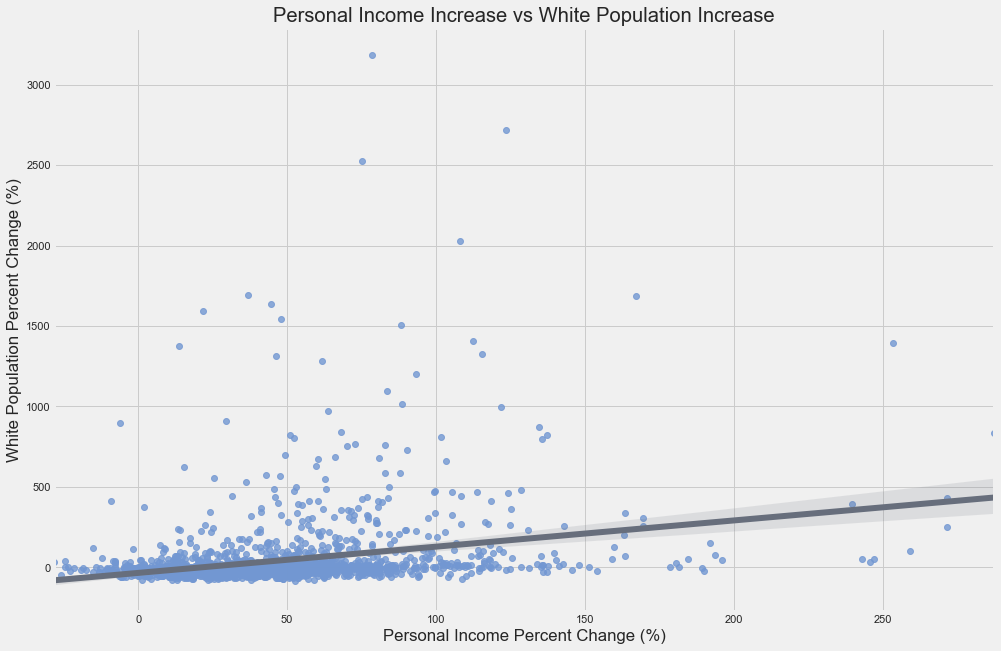

In [13]:
# change in percentage of people who are white vs change of income
ax = sns.regplot(x='INCPC12_INCPC00',y='NHWHT10%_NHWHT00%',data=df, line_kws= {'color':'#676e7c'})
ax.set(title = 'Personal Income Increase vs White Population Increase', 
       ylabel= 'White Population Percent Change (%)',
       xlabel = 'Personal Income Percent Change (%)')
plt.savefig('Images/income_vs_whitepop.png', dpi=300, 
            bbox_inches= 'tight', padding_inches = 4, transparent = True )

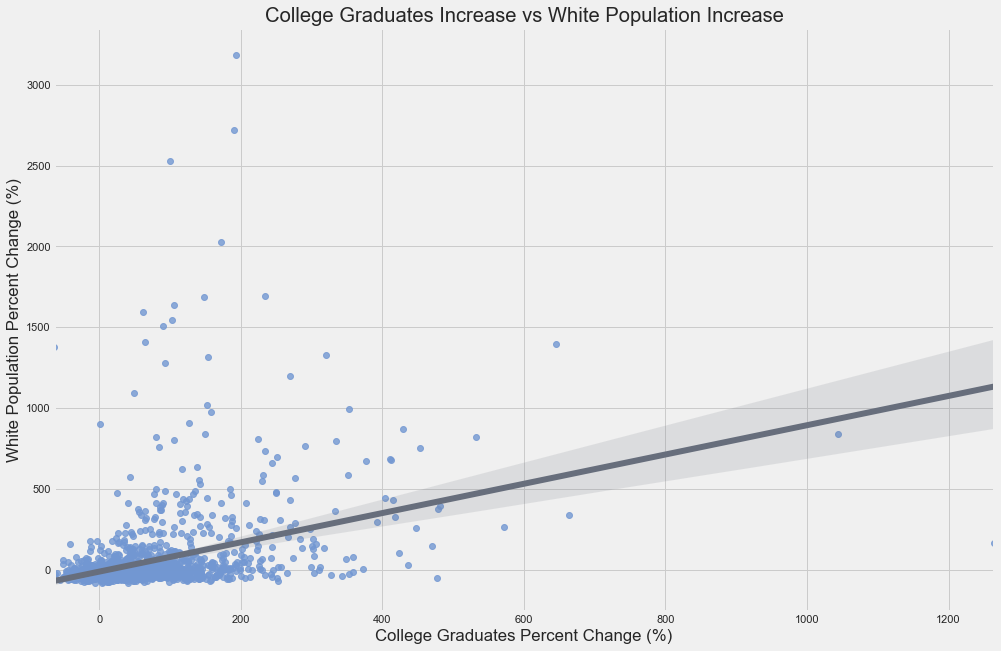

In [14]:
# change in percentage of people who are white vs education level
ax = sns.regplot(x='COL12%_COL00%',y='NHWHT10%_NHWHT00%',data=df, line_kws= {'color':'#676e7c'})
ax.set(title = 'College Graduates Increase vs White Population Increase', 
       ylabel= 'White Population Percent Change (%)',
       xlabel = 'College Graduates Percent Change (%)')
plt.savefig('Images/col_grad_vs_whitepop.png', dpi=300, 
            bbox_inches= 'tight', padding_inches = 4, transparent = True )

## Tracking the census tracts with changes in the non-white population is an important metric for gentrification

The top 3 all rank above 70% loss of its minority population.

The largest decrease in the minority population is TRACT # 36047053100, which is in South Williamsburg.  
The second is TRACT # 36047123700, Clinton Hill. A neighbor to the census tract with the largest decrease.  
The third is TRACT # 36047050900, Broadway Triangle. Another neighborhood adjacent to Williamsburg. 

### From 2000-2010, the three neighborhoods that lost the most in diversity were all in Williamsburg. 

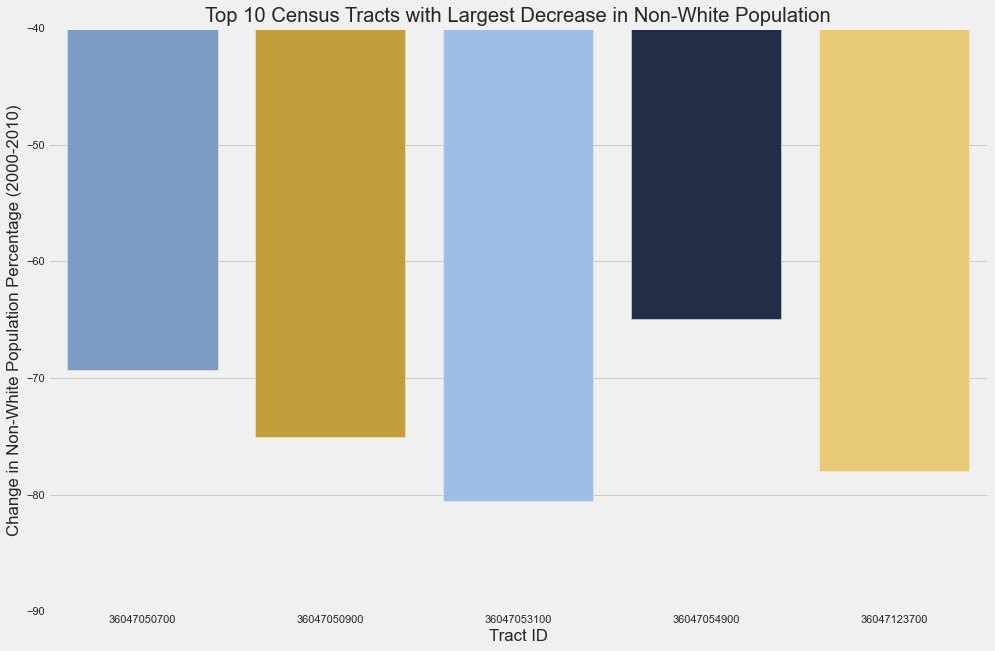

In [22]:
ax = sns.barplot(y='NONWHT10%_NONWHT00%',x='TRACTID',data=df[df['NONWHT10%_NONWHT00%']<-60])

ax.set(xlabel='Tract ID',ylabel='Change in Non-White Population Percentage (2000-2010)',
       title = 'Top 10 Census Tracts with Largest Decrease in Non-White Population', ylim = (-90,-40))
plt.savefig('Images/largest_decrease_nonwhite_pop.png', dpi=300, bbox_inches= 'tight', padding_inches = 4, transparent = True )

## Tracking the census tracts with changes in the white population is an important metric for gentrification


The largest increase population is TRACT # 36047024300, which is in Bedford-Stuyvesant.  
The second is TRACT # 36047026700, also in Bedford-Stuyvesant.    
The third is TRACT # 36047029100, also in Bedford-Stuyvesant.   
The fourth, TRACT # 36047027900, is also in Bedford-Stuyvesant.

### From 2000-2010, the four neighborhoods that gained the most in white population were in Bedford-Stuyvesant.

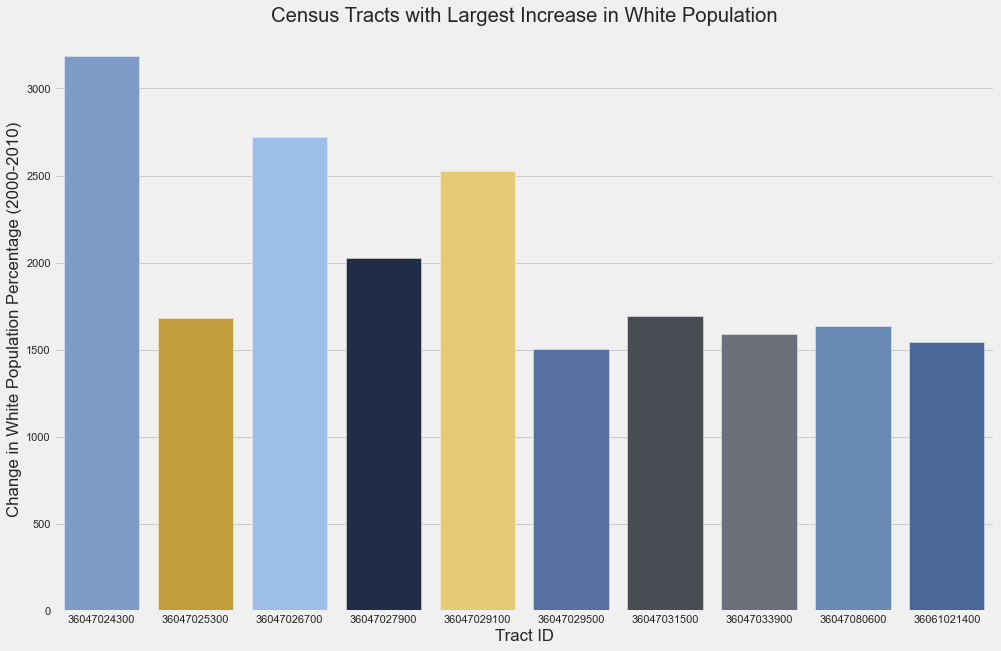

In [28]:
ax = sns.barplot(y='NHWHT10%_NHWHT00%',x='TRACTID',data=df[df['NHWHT10%_NHWHT00%']>1500])

ax.set(xlabel='Tract ID',ylabel='Change in White Population Percentage (2000-2010)',
       title = 'Census Tracts with Largest Increase in White Population')#,ylim = (90,100))
plt.savefig('Images/largest_increase_white_pop.png', dpi=300, bbox_inches= 'tight', padding_inches = 4, transparent = True )

## Tracking the census tracts with changes in monthly rent prices is an important metric for gentrification

The top 2 both saw increases of at least 450%.

The largest decrease occurred in TRACT # 36081156700, which is in Bellerose Manor, Queens.  
The second is TRACT # 36047001500, in Downtown Brooklyn.    



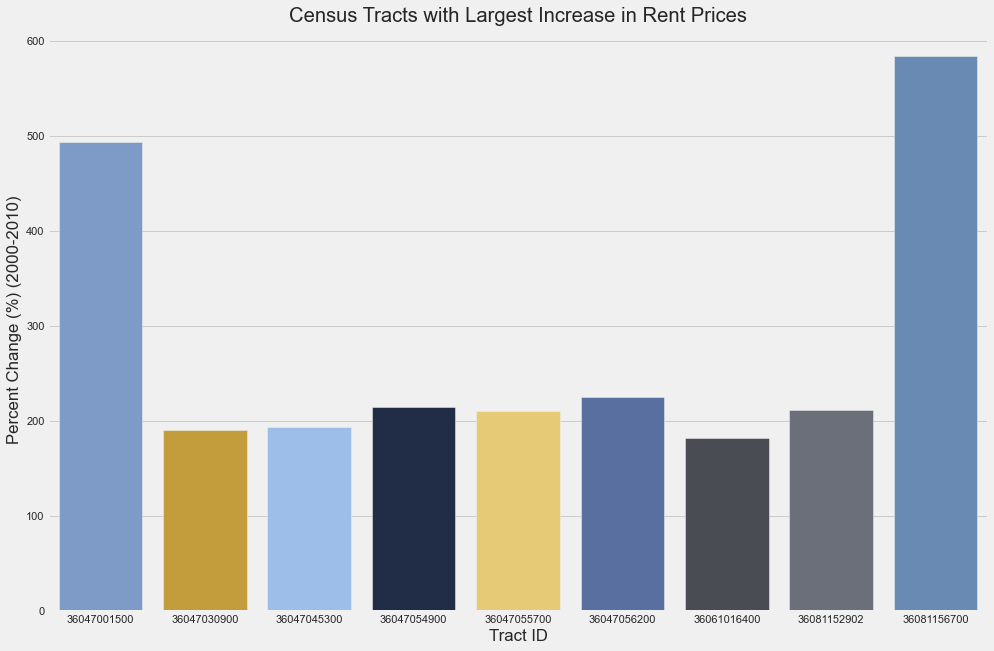

In [29]:
ax = sns.barplot(y='MRENT12_MRENT00',x='TRACTID',data=df[df['MRENT12_MRENT00']>180])
ax.set(xlabel='Tract ID',ylabel='Percent Change (%) (2000-2010)')
ax.set_title('Census Tracts with Largest Increase in Rent Prices')
plt.savefig('Images/largest_increase_rent.png', dpi=300, bbox_inches= 'tight', padding_inches = 4, transparent = True )

## Tracking the census tracts with changes in monthly rent prices is an important metric for gentrification

The top 5 saw decreases of 20%.

The largest decrease occurred in TRACT # 36081051800, which is in Jamaica Estates, Queens.  
The second is TRACT # 36061011401, on the Upper East Side, Manhattan.    



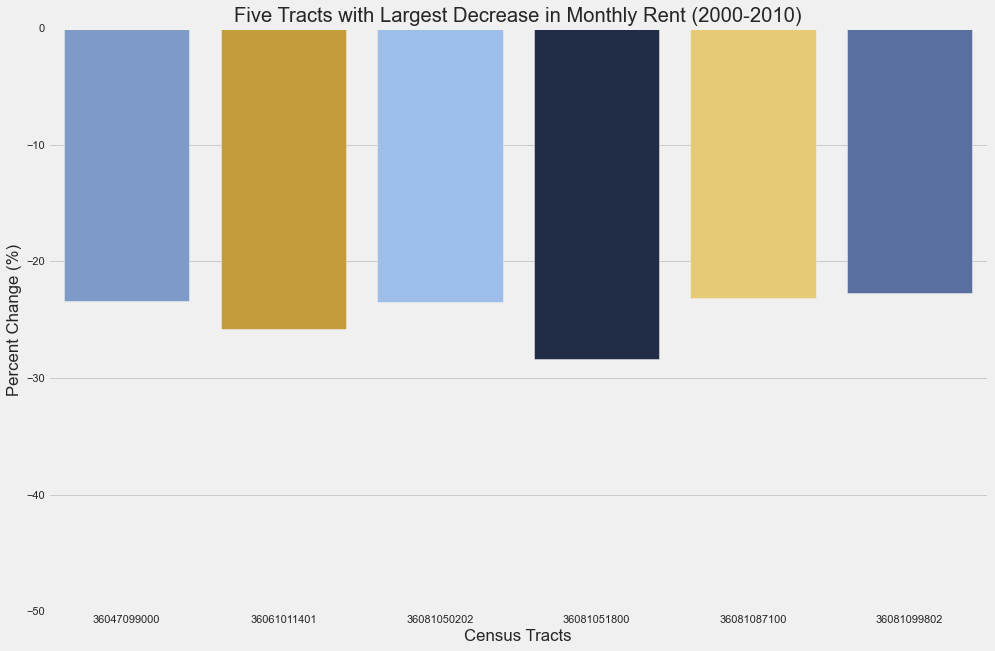

In [30]:

ax = sns.barplot(y='MRENT12_MRENT00',x='TRACTID',data=df[df['MRENT12_MRENT00']<-20])
ax.set(ylim = [-50,0], title = 'Five Tracts with Largest Decrease in Monthly Rent (2000-2010)',
       ylabel = 'Percent Change (%)', xlabel = 'Census Tracts')
plt.savefig('Images/five_rent_declines.png', dpi=300, bbox_inches= 'tight', padding_inches = 4, transparent = True )

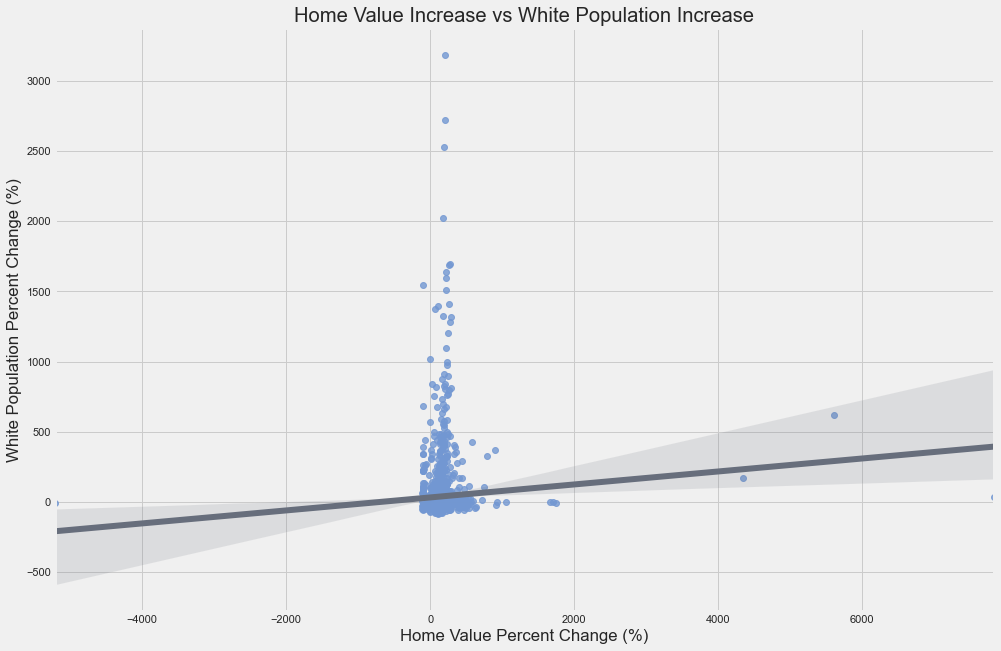

In [31]:
# change in percentage of people who are white vs change of renter occupation
ax = sns.regplot(x='MHMVAL12_MHMVAL00',y='NHWHT10%_NHWHT00%',data=df,line_kws= {'color':'#676e7c'})
ax.set(title = 'Home Value Increase vs White Population Increase', 
       ylabel= 'White Population Percent Change (%)',
       xlabel = 'Home Value Percent Change (%)')
plt.savefig('Images/hval_vs_whitepop.png', dpi=300, 
            bbox_inches= 'tight', padding_inches = 4, transparent = True )

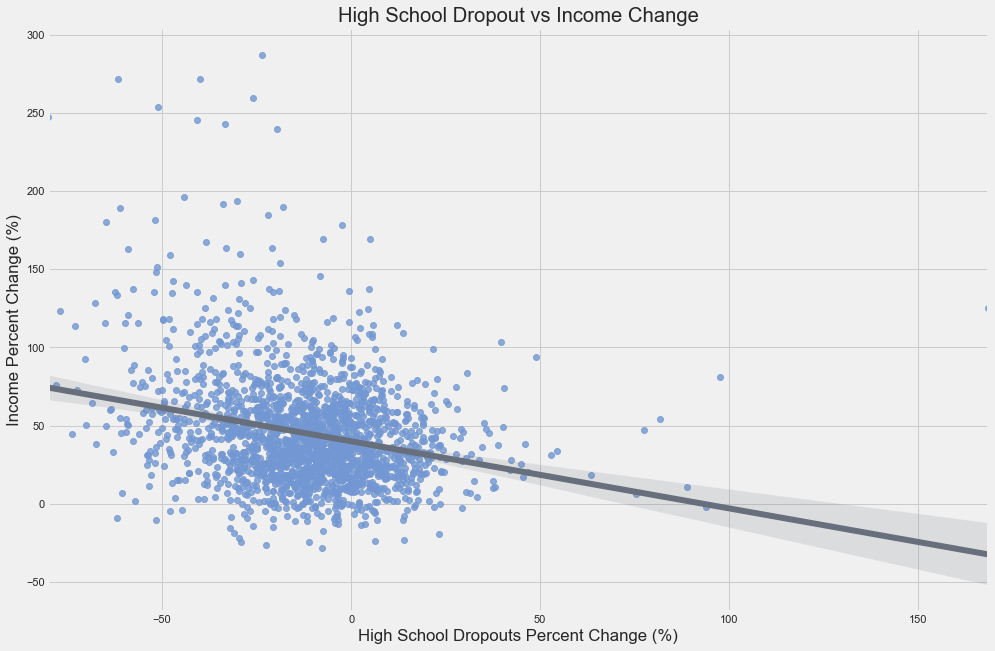

In [32]:
ax = sns.regplot(x='HS12%_HS00%',y='INCPC12_INCPC00',data=df,line_kws= {'color':'#676e7c'})
ax.set(title = 'High School Dropout vs Income Change', 
       ylabel= 'Income Percent Change (%)',
       xlabel = 'High School Dropouts Percent Change (%)')
plt.savefig('Images/hschool_vs_income.png', dpi=300, 
            bbox_inches= 'tight', padding_inches = 4, transparent = True )

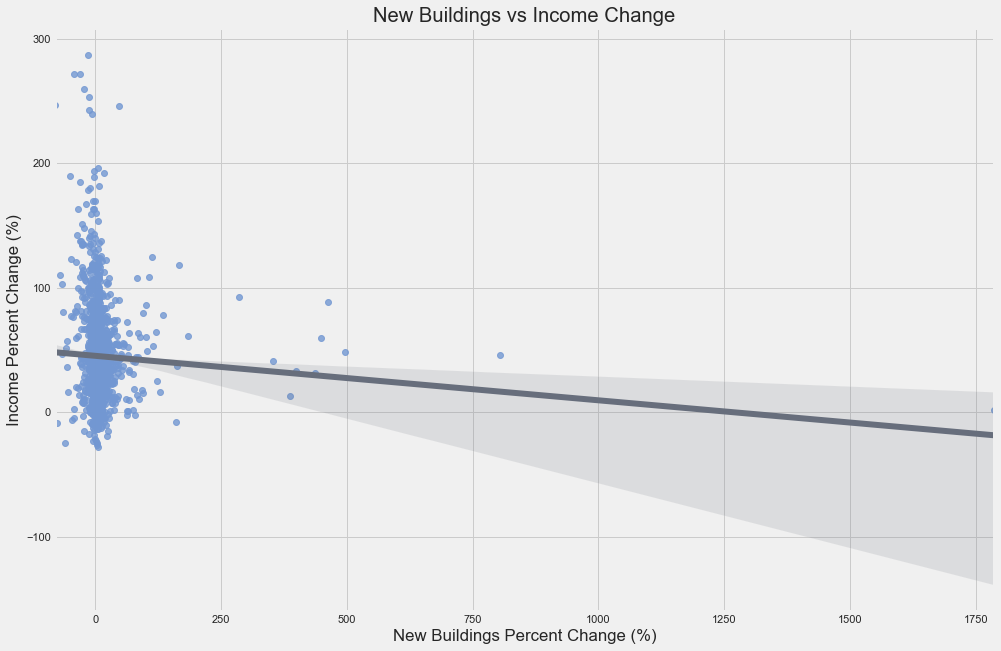

In [33]:
ax = sns.regplot(x='H30OLD12%_H30OLD00%',y='INCPC12_INCPC00',data=df,line_kws= {'color':'#676e7c'})
ax.set(title = 'New Buildings vs Income Change', 
       ylabel= 'Income Percent Change (%)',
       xlabel = 'New Buildings Percent Change (%)')
plt.savefig('Images/new_build_vs_income.png', dpi=300, 
            bbox_inches= 'tight', padding_inches = 4, transparent = True )

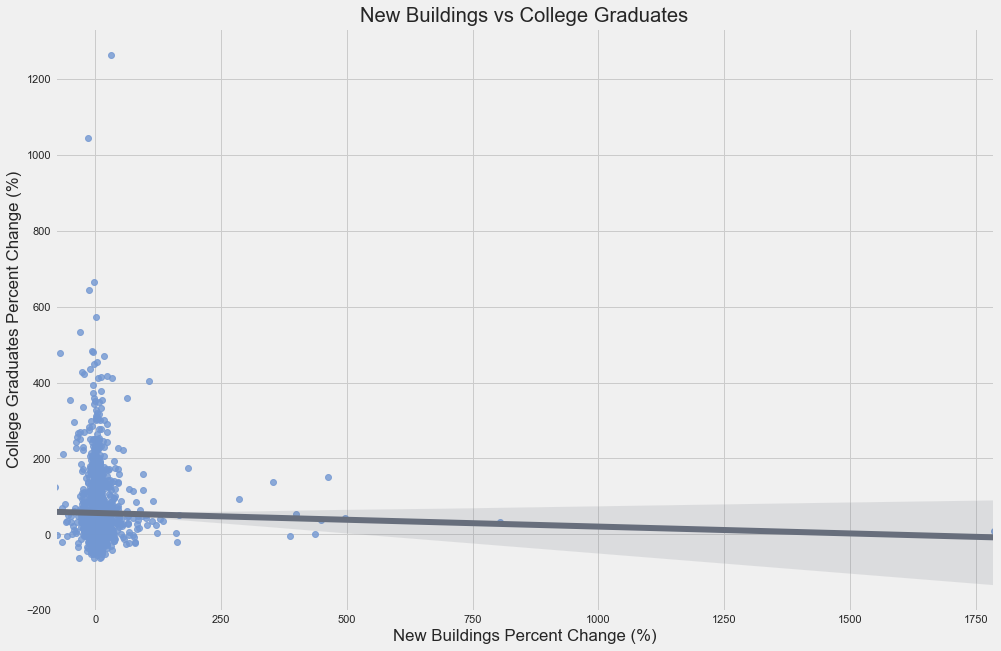

In [34]:
ax = sns.regplot(x='H30OLD12%_H30OLD00%',y='COL12%_COL00%',data=df,line_kws= {'color':'#676e7c'})
ax.set(title = 'New Buildings vs College Graduates', 
       ylabel= 'College Graduates Percent Change (%)',
       xlabel = 'New Buildings Percent Change (%)')
plt.savefig('Images/hschool_vs_income.png', dpi=300, 
            bbox_inches= 'tight', padding_inches = 4, transparent = True )

[(150.0, 250.0),
 Text(0, 0.5, 'Percent Change (%)'),
 Text(0.5, 0, 'Census Tracts'),
 Text(0.5, 1.0, 'Five Tracts with Largest Increase in Monthly Rent (2000-2010)')]

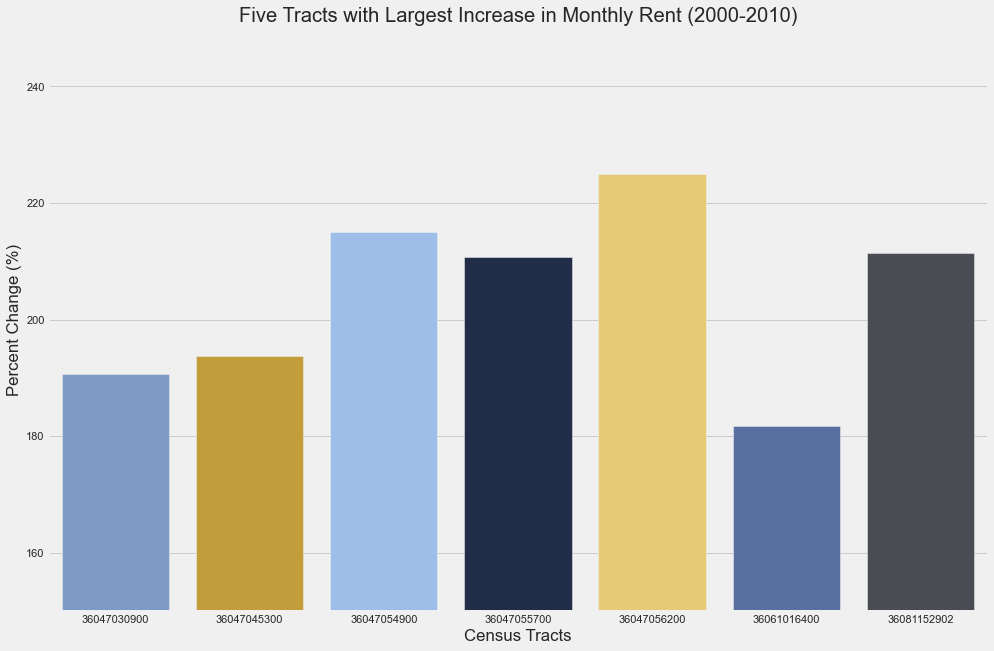

In [36]:

ax = sns.barplot(y='MRENT12_MRENT00',x='TRACTID',data=df[(df['MRENT12_MRENT00']>180) 
                                                         & (df['MRENT12_MRENT00']< 300)])
ax.set( title = 'Five Tracts with Largest Increase in Monthly Rent (2000-2010)',
       ylabel = 'Percent Change (%)', xlabel = 'Census Tracts',ylim = (150,250))
#plt.savefig('Images/five_rent_declines.png', dpi=300, bbox_inches= 'tight', 
            #padding_inches = 4, transparent = True )



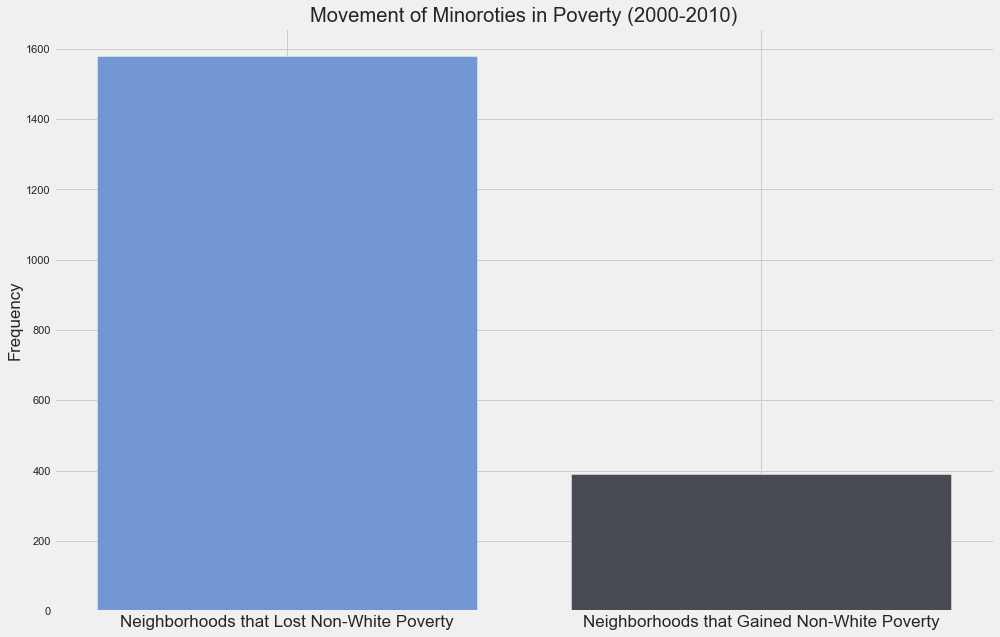

In [38]:
ax = plt.bar(x = ['Neighborhoods that Lost Non-White Poverty','Neighborhoods that Gained Non-White Poverty'],
             height = [len(df[df['NONWHT_POV12%_NONWHT_POV00%'] <0]),len(df[df['NONWHT_POV12%_NONWHT_POV00%'] > 0])],
             data=df,color = ('#7297d2','#484b54'))
plt.ylabel('Frequency') 
plt.xlabel('')
plt.xticks([0,1],['Neighborhoods that Lost Non-White Poverty','Neighborhoods that Gained Non-White Poverty'], fontsize = 17)
plt.title('Movement of Minoroties in Poverty (2000-2010)')
plt.savefig('Images/poverty_demo_change.png', dpi=300, bbox_inches= 'tight', padding_inches = 4, transparent = True )

## Map Graphics

I will look at the different changes on a macro scale per boro

In [39]:
from shapely.geometry import Point,Polygon
import geopandas as gpd
import descartes

In [40]:
bx_g = gpd.read_file('DATA/GeoData/bronx_geodata/tl_2010_36005_tract10.shp')
bk_g = gpd.read_file('DATA/GeoData/brooklyn_geodata/tl_2010_36047_tract10.shp')
mh_g = gpd.read_file('DATA/GeoData/manhattan_geodata/tl_2010_36061_tract10.shp')
qn_g = gpd.read_file('DATA/GeoData/queens_geodata/tl_2010_36081_tract10.shp')


bx_g.rename(columns={'GEOID10':'TRACTID'},inplace=True)
bk_g.rename(columns={'GEOID10':'TRACTID'},inplace=True)
mh_g.rename(columns={'GEOID10':'TRACTID'},inplace=True)
qn_g.rename(columns={'GEOID10':'TRACTID'},inplace=True)

In [42]:
bx = pd.read_pickle('PKL/bx_gpd.pkl')
bx_g = bx_g.merge(bx, on='TRACTID', how = 'left')


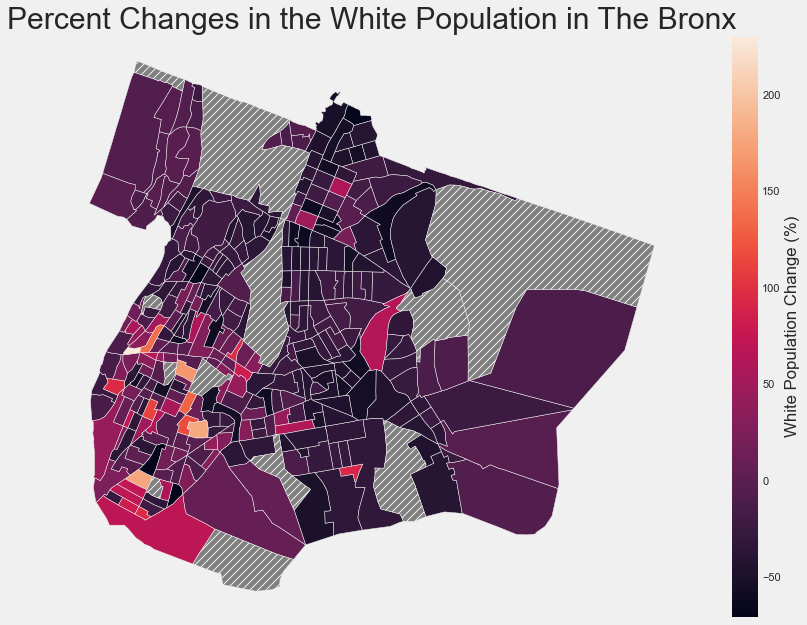

In [45]:
fig, ax = plt.subplots(figsize = (15,10))

bx_g.plot(column='NHWHT10%_NHWHT00%', ax=ax, 
          legend=True,missing_kwds={'color': 'grey', "label": "Non-Residential","hatch": "///"},
          legend_kwds={'label': "White Population Change (%)"});
ax.set_title('Percent Changes in the White Population in The Bronx',fontdict = {'fontsize': 30})
ax.grid(False)
ax.set_xticks([])
ax.set_yticks([])
plt.savefig('Images/bronx_map_white_change.png', dpi=300, bbox_inches= 'tight', 
            padding_inches = 4, transparent = True )


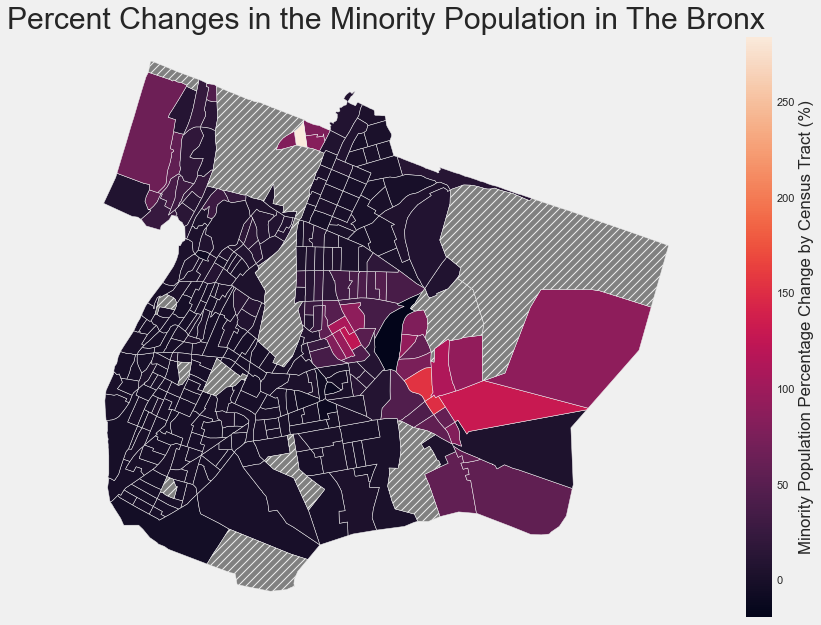

In [46]:
fig, ax = plt.subplots(figsize = (15,10))
bx_g.plot(column='NONWHT10%_NONWHT00%', ax=ax, 
          legend=True,missing_kwds={'color': 'grey', "label": "Non-Residential","hatch": "///"},
          legend_kwds={'label': "Minority Population Percentage Change by Census Tract (%)"});
ax.set_title('Percent Changes in the Minority Population in The Bronx',fontdict = {'fontsize': 30})
ax.grid(False)
ax.set_xticks([])
ax.set_yticks([])
plt.savefig('Images/bronx_map_minority_change.png', dpi=300, bbox_inches= 'tight', 
            padding_inches = 4, transparent = True )


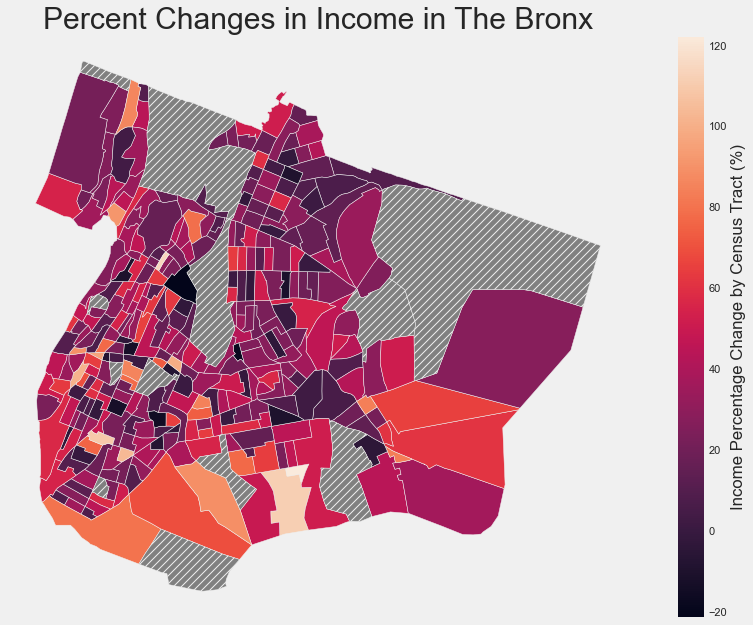

In [47]:
fig, ax = plt.subplots(figsize = (15,10))
bx_g.plot(column='INCPC12_INCPC00', ax=ax, 
          legend=True,missing_kwds={'color': 'grey', "label": "Non-Residential","hatch": "///"},
          legend_kwds={'label': "Income Percentage Change by Census Tract (%)"});
ax.set_title('Percent Changes in Income in The Bronx',fontdict = {'fontsize': 30})
ax.grid(False)
ax.set_xticks([])
ax.set_yticks([])
plt.savefig('Images/bronx_map_income_change.png', dpi=300, bbox_inches= 'tight', 
            padding_inches = 4, transparent = True )


In [48]:
bk = pd.read_pickle('PKL/bk_gpd.pkl')
bk_g = bk_g.merge(bk, on='TRACTID', how = 'left')

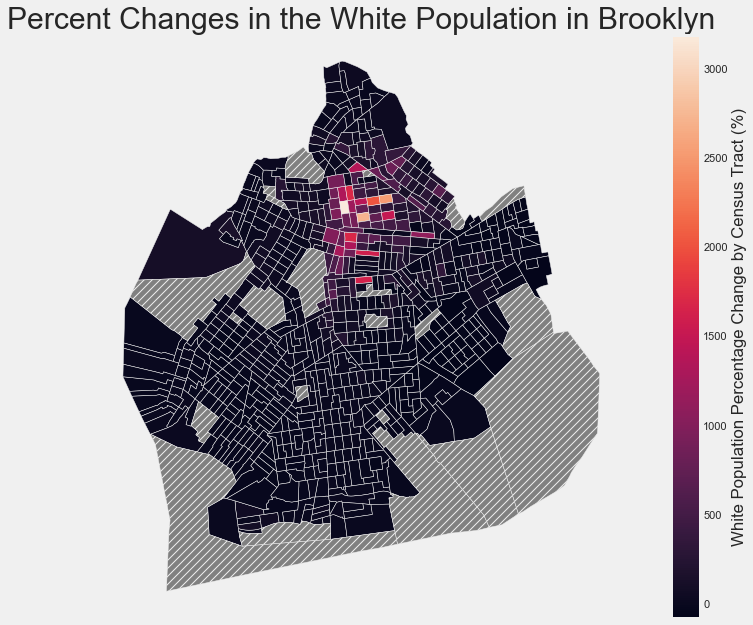

In [49]:
fig, ax = plt.subplots(figsize = (15,10))

bk_g.plot(column='NHWHT10%_NHWHT00%', ax=ax, 
          legend=True,missing_kwds={'color': 'grey', "label": "Non-Residential","hatch": "///"},
          legend_kwds={'label': "White Population Percentage Change by Census Tract (%)"});
ax.set_title('Percent Changes in the White Population in Brooklyn',fontdict = {'fontsize': 30})
ax.grid(False)
ax.set_xticks([])
ax.set_yticks([])
plt.savefig('Images/brooklyn_map_white_change.png', dpi=300, bbox_inches= 'tight', 
            padding_inches = 4, transparent = True )


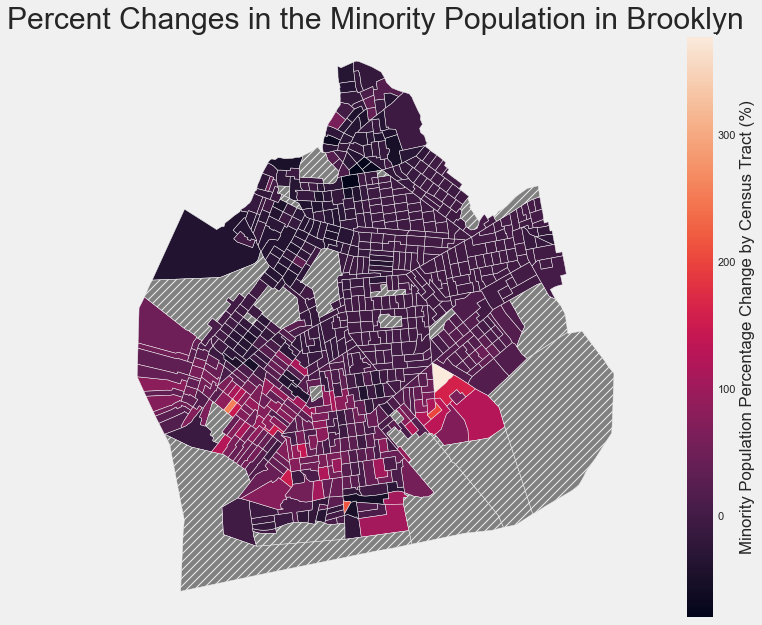

In [50]:
fig, ax = plt.subplots(figsize = (15,10))

bk_g.plot(column='NONWHT10%_NONWHT00%', ax=ax, 
          legend=True,missing_kwds={'color': 'grey', "label": "Non-Residential","hatch": "///"},
          legend_kwds={'label': "Minority Population Percentage Change by Census Tract (%)"});
ax.set_title('Percent Changes in the Minority Population in Brooklyn',fontdict = {'fontsize': 30})
ax.grid(False)
ax.set_xticks([])
ax.set_yticks([])
plt.savefig('Images/brooklyn_map_minority_change.png', dpi=300, bbox_inches= 'tight', 
            padding_inches = 4, transparent = True )


In [51]:
mh = pd.read_pickle('PKL/mh_gpd.pkl')
mh_g = mh_g.merge(mh, on='TRACTID', how = 'left')

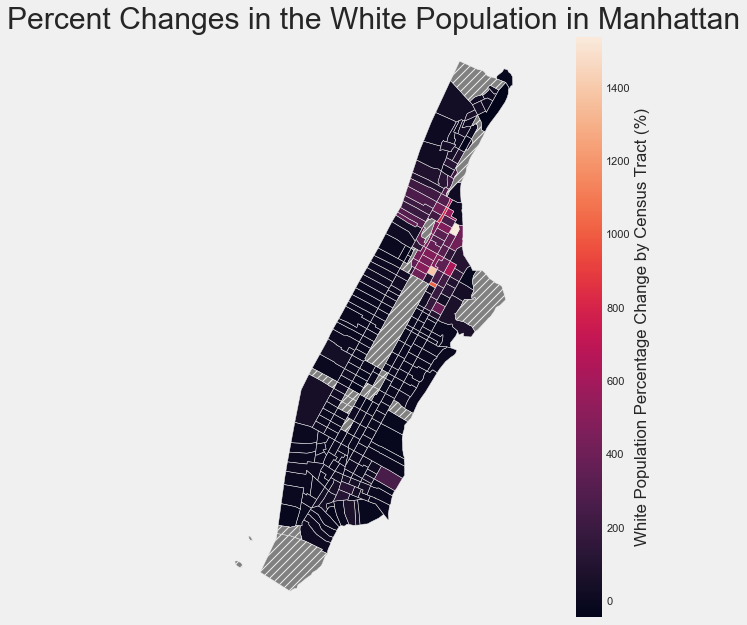

In [52]:
fig, ax = plt.subplots(figsize = (15,10))

mh_g.plot(column='NHWHT10%_NHWHT00%', ax=ax, 
          legend=True,missing_kwds={'color': 'grey', "label": "Non-Residential","hatch": "///"},
          legend_kwds={'label': "White Population Percentage Change by Census Tract (%)"});
ax.set_title('Percent Changes in the White Population in Manhattan',fontdict = {'fontsize': 30})
ax.grid(False)
ax.set_xticks([])
ax.set_yticks([])
plt.savefig('Images/manhattan_map_white_change.png', dpi=300, bbox_inches= 'tight', 
            padding_inches = 4, transparent = True )


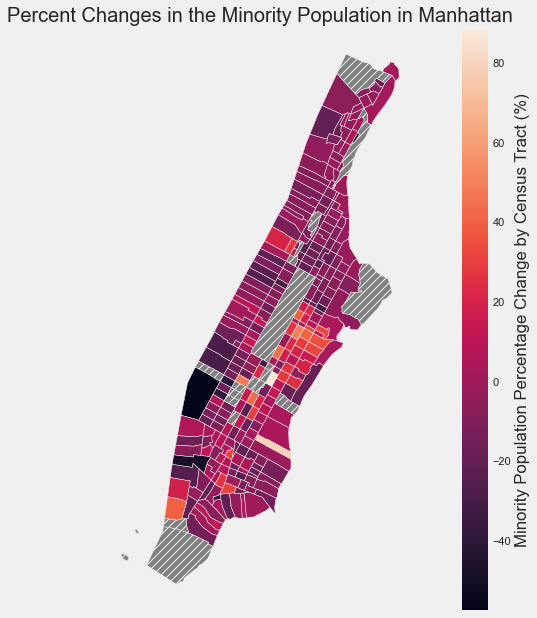

In [54]:
fig, ax = plt.subplots(figsize = (15,10))

mh_g.plot(column='NONWHT10%_NONWHT00%', ax=ax, 
          legend=True,missing_kwds={'color': 'grey', "label": "Non-Residential","hatch": "///"},
          legend_kwds={'label': "Minority Population Percentage Change by Census Tract (%)"});
ax.set_title('Percent Changes in the Minority Population in Manhattan',fontdict = {'fontsize': 20})
ax.grid(False)
ax.set_xticks([])
ax.set_yticks([])
plt.savefig('Images/manhattan_map_minority_change.png', dpi=300, bbox_inches= 'tight', 
            padding_inches = 4, transparent = True )